# Pulso rectangular

El pulso rectangular se construye como la superposición de funciones cosenoidales, tal como lo indica su serie de Fourier.

https://lpsa.swarthmore.edu/Fourier/Series/ExFS.html


## Visualización de las funciones

A continuación un pequeño ejemplo para visualizar las funciones en el dominio del tiempo.

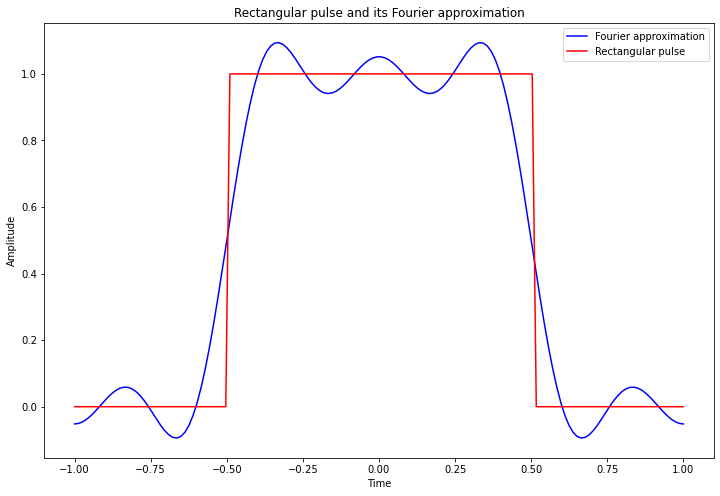

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Signal period
T = 2
# Duty cycle ratio
k = 2
# Number of time samples per signal period
N = 150
# Amplitude
A = 1
# time values
t = np.linspace(-T/2, T/2, N)
# number of Fourier series terms, must be odd
n_coef = 5
# DC value for the series
a0 = A/k
# Angular frequency of the main signal
w0 = 2*np.pi/T
# Function vector
x = np.zeros(N)

# Applying the Fourier series
for n in np.arange(n_coef):
    coef_n = 2*A*np.sin((n+1)*np.pi/k)
    for m in np.arange(N):
        x[m] += coef_n*np.cos((n+1)*w0*t[m])/((n+1)*np.pi)

# Building the rectangular pulse function
N_high = np.ceil(N/k).astype(int)
N_low = np.ceil((N - N_high)/2).astype(int)
x_r = A*np.concatenate((np.zeros(N_low), np.ones(N_high), np.zeros(N - N_high - N_low)))

# Plot the curves
plt.figure(figsize=(12,8))
plt.plot(t, x + a0, 'b', t, x_r, 'r')
plt.title(r'Rectangular pulse and its Fourier approximation')
plt.xlabel(r'Time')
plt.ylabel(r'Amplitude')
plt.legend(('Fourier approximation', 'Rectangular pulse'))
plt.show()